There are four datasets we use to do EDA
- bike_detail.csv
- car_sale.csv
- amazon.csv
- spotify.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving bike_detail.csv to bike_detail.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("bike_detail.csv")

In [7]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [8]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [10]:
df.info() # ex_showroom_price contain null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [11]:
df.notnull().sum()

,0
name,1061
selling_price,1061
year,1061
seller_type,1061
owner,1061
km_driven,1061
ex_showroom_price,626


In [12]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [13]:
# 1.What is the range of selling prices in the dataset?
min_selling_price = df.selling_price.min()
max_selling_price = df.selling_price.max()

print(f"Range of Selling Price: {min_selling_price} - {max_selling_price}")
# output --> Range of Selling Price: 5000 - 760000

Range of Selling Price: 5000 - 760000


In [14]:
# 2.What is the median selling price for bikes in the dataset?
median_selling_price = df.selling_price.median()
print(f"Median Selling Price: {median_selling_price}")

Median Selling Price: 45000.0


Most Common Seller Type: Individual


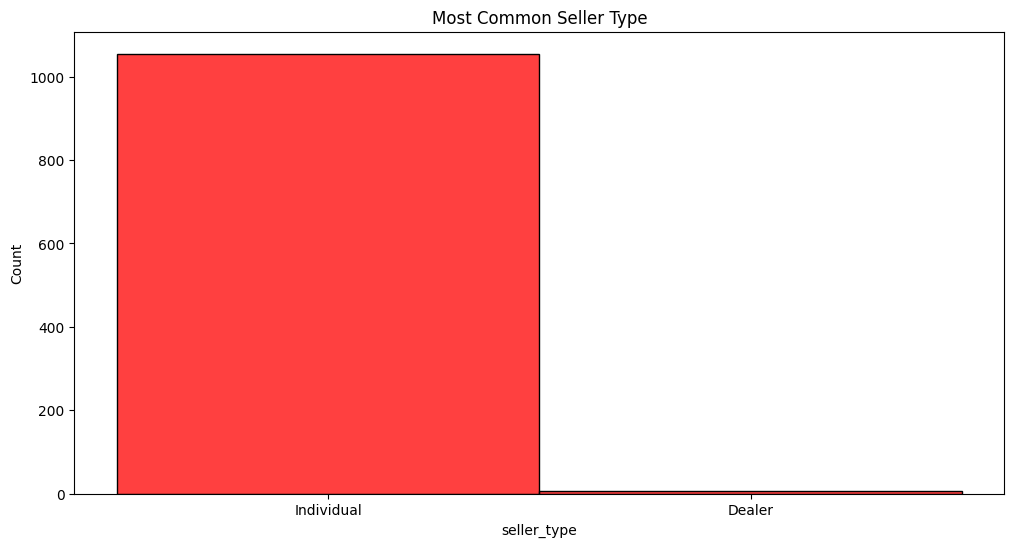


 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [15]:
# 3.What is the most common seller type?
most_common_seller = df.seller_type.mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")
# vishualize the most_common_type
plt.figure(figsize=(12, 6))
sns.histplot(df.seller_type, kde=False, color='red')
plt.title("Most Common Seller Type")
plt.show()

# most common seller_type
print("\n",df.seller_type.value_counts())

In [16]:
# 4.How many bikes have driven more than 50,000 kilometers?
print(f"Number of bikes driven > 50000: {(df.km_driven > 50000).sum()}") # Output : no of bikes driven > 50000: 170

# using filtering method to find no of bikes driven > 50000
# df[df.km_driven > 50000].shape[0]

Number of bikes driven > 50000: 170


In [17]:
# 5.What is the average km_driven value for each ownership type?
avg_km_driven = df.groupby('owner')['km_driven'].mean()
print(f"The averagekm_driven value for each ownership type: {avg_km_driven}")

The averagekm_driven value for each ownership type: owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [18]:
# 6.What proportion of bikes are from the year 2015 or older?

count_older_bikes = (df.year <= 2015).sum()
total_data = len(df)
proportion_of_bikes = count_older_bikes/total_data
print(f"Total proportion of bikes are from the year 2015 or older: {proportion_of_bikes}")


Total proportion of bikes are from the year 2015 or older: 0.5664467483506126


Missing value for each columns: name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


/tmp/ipython-input-895160091.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value.index, y=missing_value.values, palette="viridis")


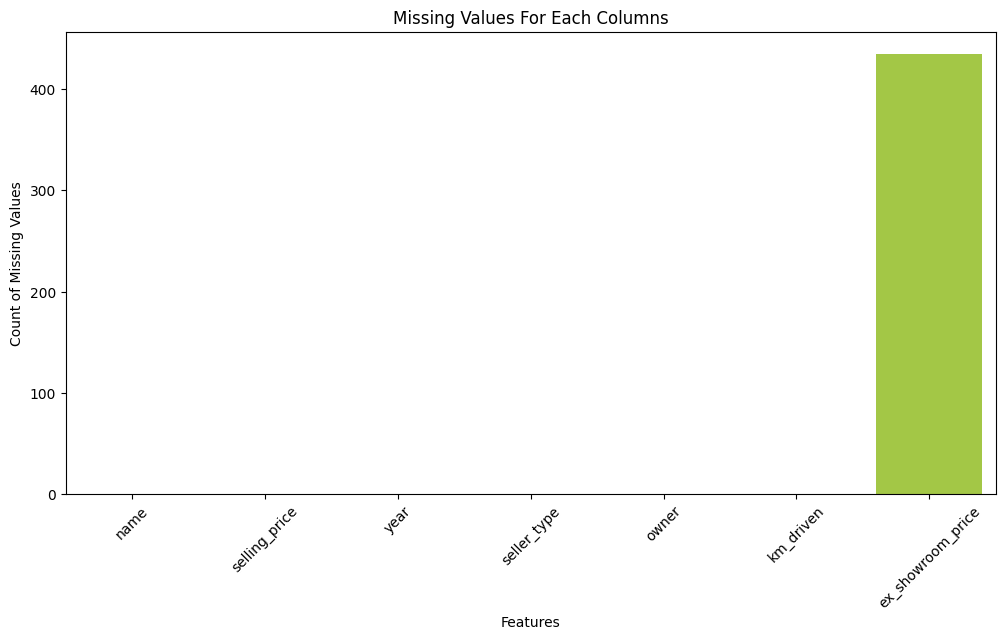

In [19]:
# 7.What is the trend of missing values across the dataset?

missing_value = df.isnull().sum()
print(f"Missing value for each columns: {missing_value}")

# Vishulize it using barchart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_value.index, y=missing_value.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Missing Values For Each Columns")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.show()



In [20]:
# 8.What is the highest ex_showroom_price recorded, and for which bike?
df.ex_showroom_price.fillna(0) # fill NaN value with 0

# Method 1
max_sales = df.ex_showroom_price.max()
name = df.loc[df.ex_showroom_price.idxmax(), 'name']
print(f"Highest Ex-showroom Price: {max_sales} And Name: {name}\n")

# Method 2
df[df.ex_showroom_price == df.ex_showroom_price.max()]


Highest Ex-showroom Price: 1278000.0 And Name: Harley-Davidson Street Bob



,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [21]:
# 9.What is the total number of bikes listed by each seller type?
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


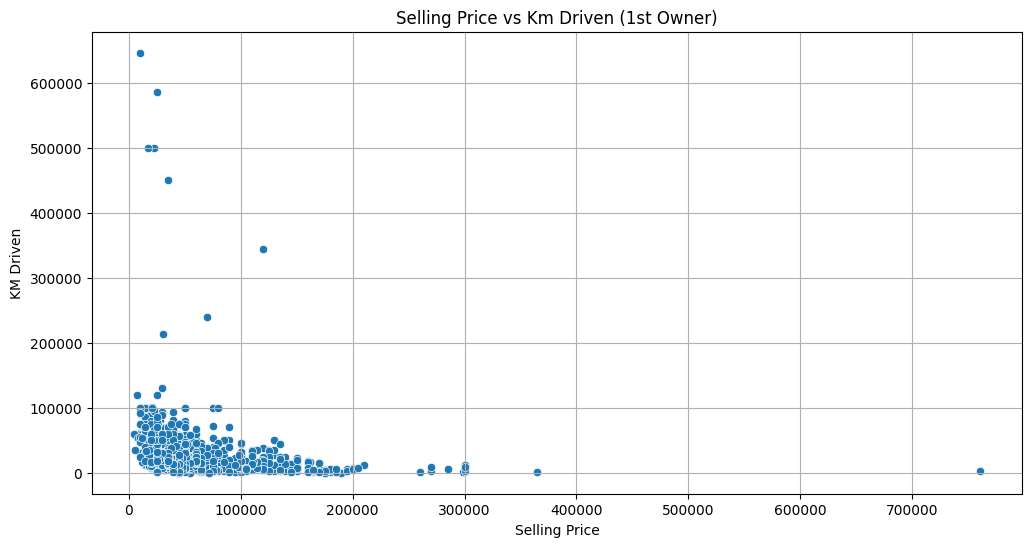

In [23]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner = df[df.owner == '1st owner']
plt.figure(figsize=(12,6))
sns.scatterplot(x="selling_price", y="km_driven", data=first_owner)
plt.title('Selling Price vs Km Driven (1st Owner)')
plt.xlabel('Selling Price')
plt.ylabel('KM Driven')
plt.grid(True)
plt.show()

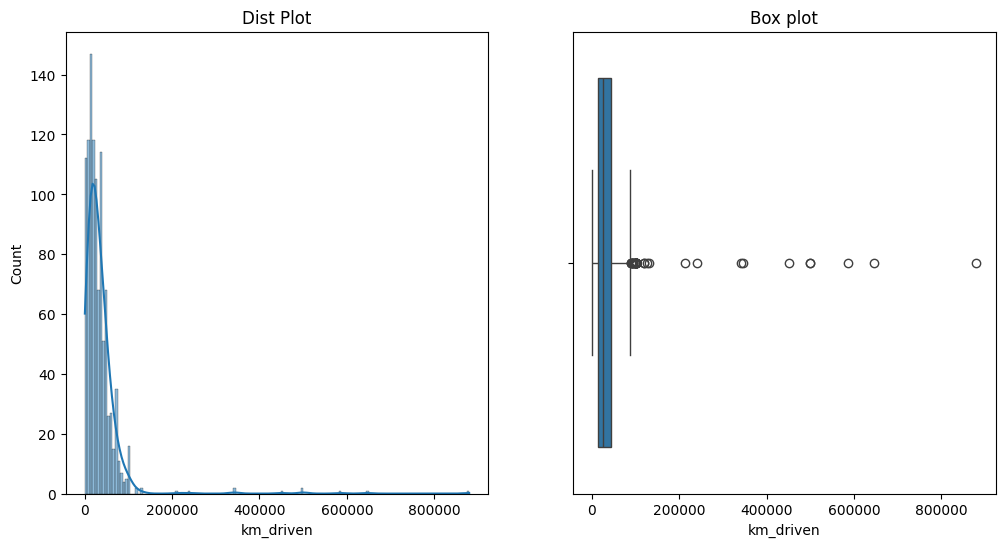

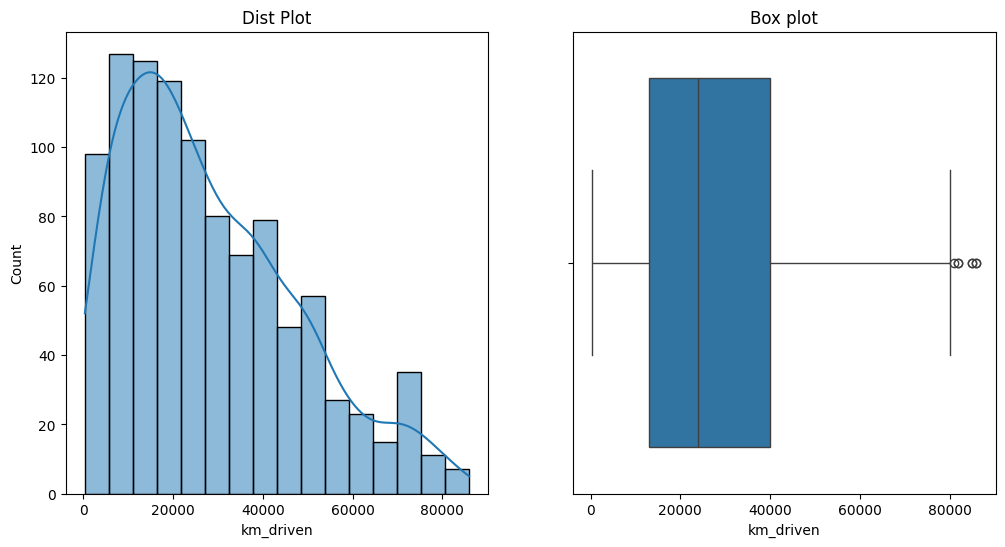

In [27]:
# 11.Identify and remove outliers in the km_driven column using the IQR method?
# outlier detection
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['km_driven'], kde = True)
plt.title("Dist Plot")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'km_driven')
plt.title("Box plot")
plt.show()

# Remove outlier
Q1 = df.km_driven.quantile(0.25)
Q3 = df.km_driven.quantile(0.75)
IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

df_filtered = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]

#Vishualize the outlier removal
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered.km_driven, kde = True)
plt.title("Dist Plot")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x = 'km_driven')
plt.title("Box plot")
plt.show()

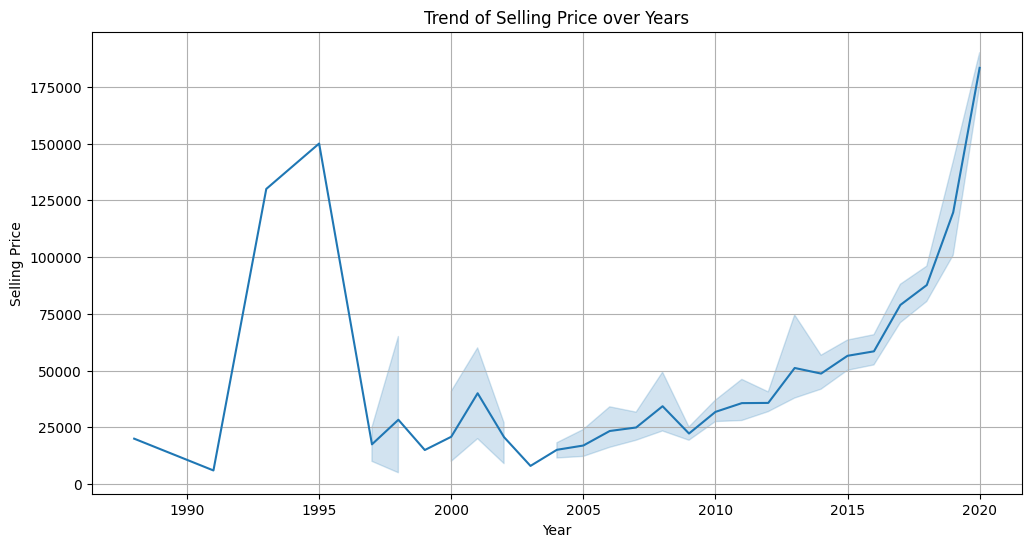

In [28]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price?

plt.figure(figsize=(12, 6))
# Using a line plot to show the trend of average price over years
sns.lineplot(x='year', y='selling_price', data=df)
plt.title('Trend of Selling Price over Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

Average Depreciation by Age (Years):
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
Name: depreciation, dtype: float64


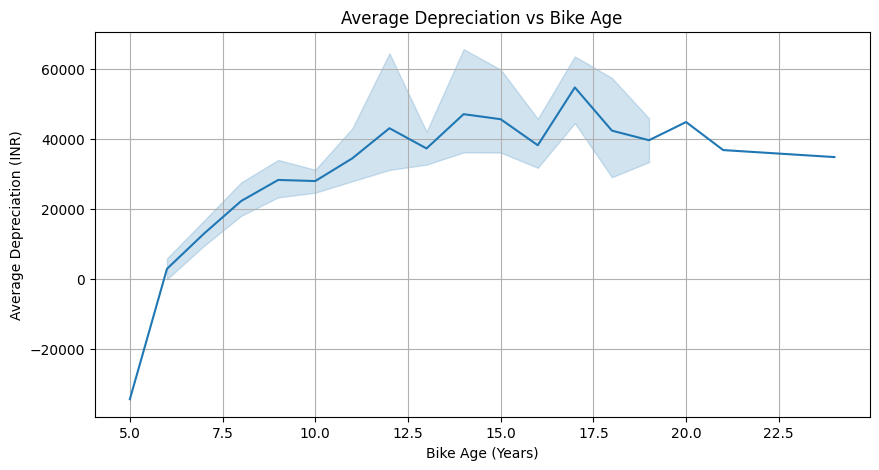

In [30]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
df['age'] = current_year - df['year']
# Calculate depreciation (Ex-showroom - Selling Price)
# We drop rows where ex_showroom_price is missing for this calculation
df_dep = df.dropna(subset=['ex_showroom_price']).copy()
df_dep['depreciation'] = df_dep['ex_showroom_price'] - df_dep['selling_price']

avg_depreciation_by_age = df_dep.groupby('age')['depreciation'].mean()
print("Average Depreciation by Age (Years):")
print(avg_depreciation_by_age.head(10))

plt.figure(figsize=(10,5))
sns.lineplot(x='age', y='depreciation', data=df_dep, estimator='mean')
plt.title("Average Depreciation vs Bike Age")
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Depreciation (INR)")
plt.grid(True)
plt.show()



In [35]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

# Calculate average price per year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.rename(columns={'selling_price': 'avg_year_price'}, inplace=True)
# Merge back to original dataframe
df_merged = pd.merge(df, avg_price_by_year, on='year')
# Filter for bikes > 1.5 times the average price of that year
high_price_bikes = df_merged[df_merged['selling_price'] > 1.5 * df_merged['avg_year_price']]

print(f"Number of bikes priced significantly above average for their year: {len(high_price_bikes)}")
print(high_price_bikes[['name', 'year', 'selling_price', 'avg_year_price']].head(5))


Number of bikes priced significantly above average for their year: 157
                                    name  year  selling_price  avg_year_price
2    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000    34289.285714
13                         Yamaha YZF R3  2019         365000   119689.511628
18   Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
23                         Jawa Standard  2019         180000   119689.511628


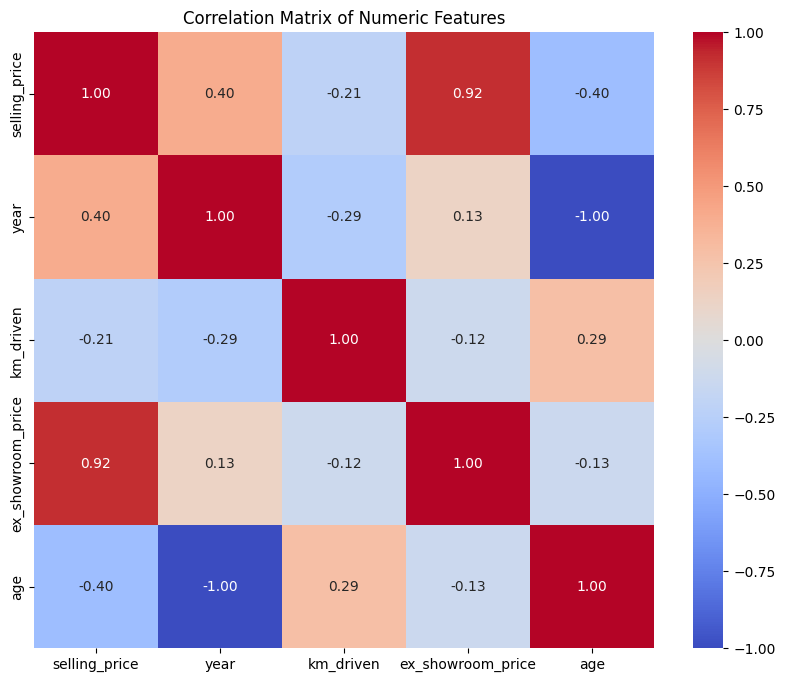

In [34]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr() # calculate correlation

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

                          EDA - 2: Title: Car Sale Dataset


- What is the average selling price of cars for each dealer, and how does it compare across different dealers?
- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?
- What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?
- What is the distribution of car prices across different regions?
- What is the distribution of cars based on body styles?
- How does the average selling price of cars vary by customer gender and annual income?
- What is the distribution of car prices by region, and how does the number of cars sold vary by region?
- How does the average car price differ between cars with different engine sizes?
- How do car prices vary based on the customer’s annual income bracket?
- What are the top 5 car models with the highest number of sales, and how does their price distribution look?
- How does car price vary with engine size across different car colors, and which colors have the highest price
variation?
- Is there any seasonal trend in car sales based on the date of sale?
- How does the car price distribution change when considering different combinations of body style and
transmission type?
- What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?
- How does the average car price vary across different car models and engine types?

In [99]:
from google.colab import files
uploaded = files.upload()

Saving car_sale.csv to car_sale (1).csv


In [100]:
df = pd.read_csv('car_sale.csv', delimiter=',')
df


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [102]:
df['Date'] = pd.to_datetime(df['Date'])
df['Engine'] = df['Engine'].str.replace('Â', '', regex=False).str.strip()
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [104]:
df.describe()

,Date,Annual Income,Price ($),Phone
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


In [105]:
df.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,2023-12-31,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,Double Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [106]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean()
print(f"Top 5 Dealers by Average Selling Price:\n {dealer_avg_price.head()}")
print(f"\nBottom 5 Dealers by Average Selling Price:\n {dealer_avg_price.tail()}")


Top 5 Dealers by Average Selling Price:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc    27217.261563
C & M Motors Inc                       28111.755200
Capitol KIA                            28189.703822
Chrysler Plymouth                      27555.526400
Chrysler of Tri-Cities                 28123.091054
Name: Price ($), dtype: float64

Bottom 5 Dealers by Average Selling Price:
 Dealer_Name
Scrivener Performance Engineering    28297.371589
Star Enterprises Inc                 28113.055244
Suburban Ford                        28112.206758
Tri-State Mack Inc                   28095.562050
U-Haul CO                            28769.919006
Name: Price ($), dtype: float64


Brand with highest price variation (Standard Deviation):
Company
Acura        8183.046414
Audi        12904.243867
BMW         15065.578723
Buick       17142.232626
Cadillac    19517.120220
Name: Price ($), dtype: float64


/tmp/ipython-input-2282328682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price_std.index, y=brand_price_std.values, palette='viridis')


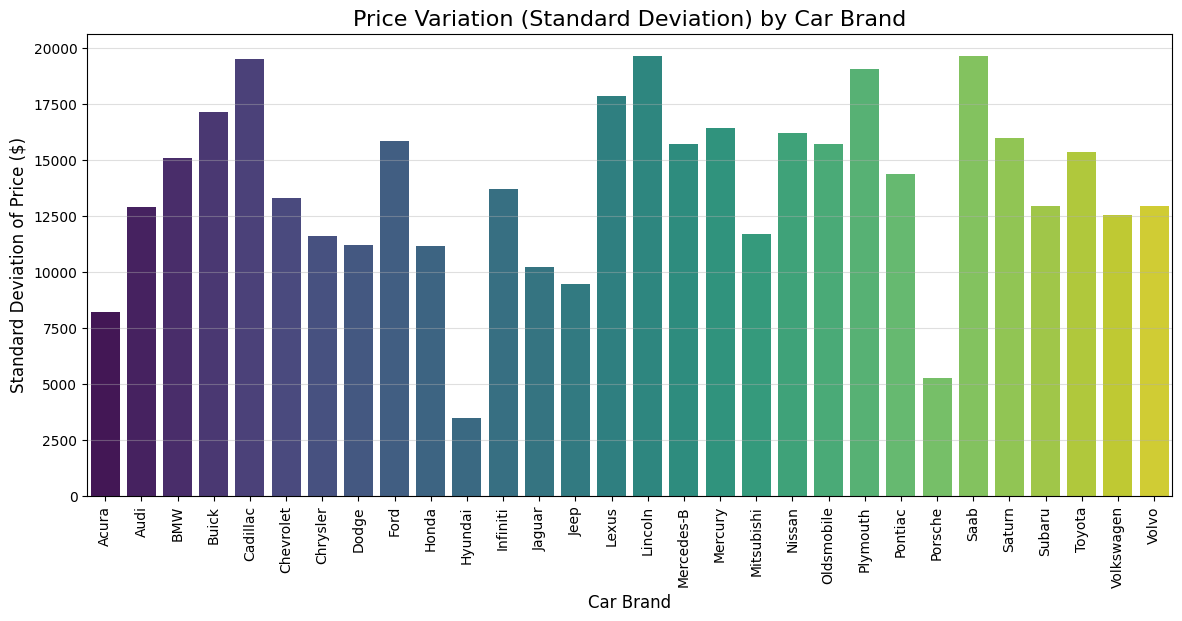

In [107]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
brand_price_std = df.groupby('Company')['Price ($)'].std()
print(f"Brand with highest price variation (Standard Deviation):\n{brand_price_std.head()}")

plt.figure(figsize=(14,6))
sns.barplot(x=brand_price_std.index, y=brand_price_std.values, palette='viridis')

plt.title("Price Variation (Standard Deviation) by Car Brand", fontsize=16)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Standard Deviation of Price ($)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.4)
plt.show()


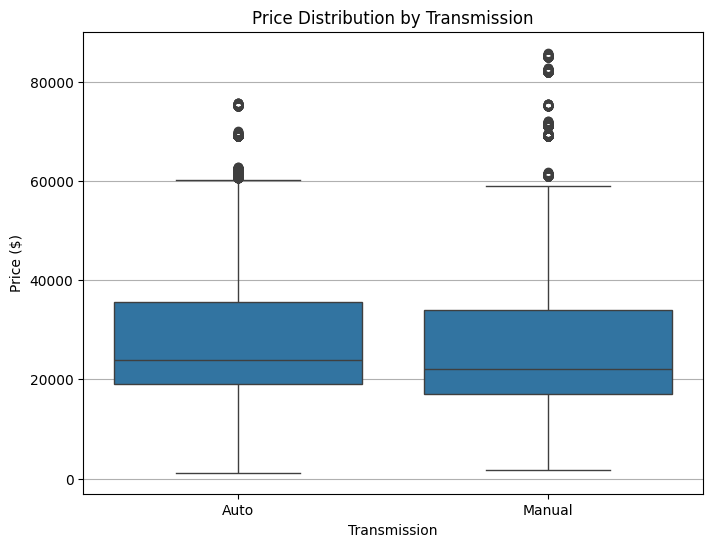


Interquartile Range (IQR) by Transmission: 
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [108]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission')
plt.grid(True, axis='y')
plt.show()

iqr_transmission = df.groupby('Transmission')['Price ($)'].apply(
    lambda x: np.percentile(x.dropna(), 75) - np.percentile(x.dropna(), 25)
)

print(f"\nInterquartile Range (IQR) by Transmission: \n{iqr_transmission}")



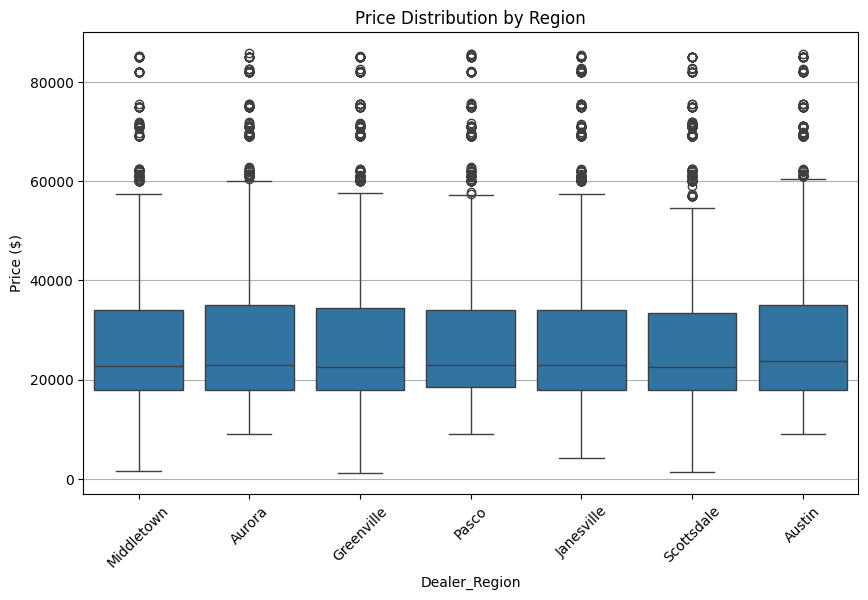

In [109]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


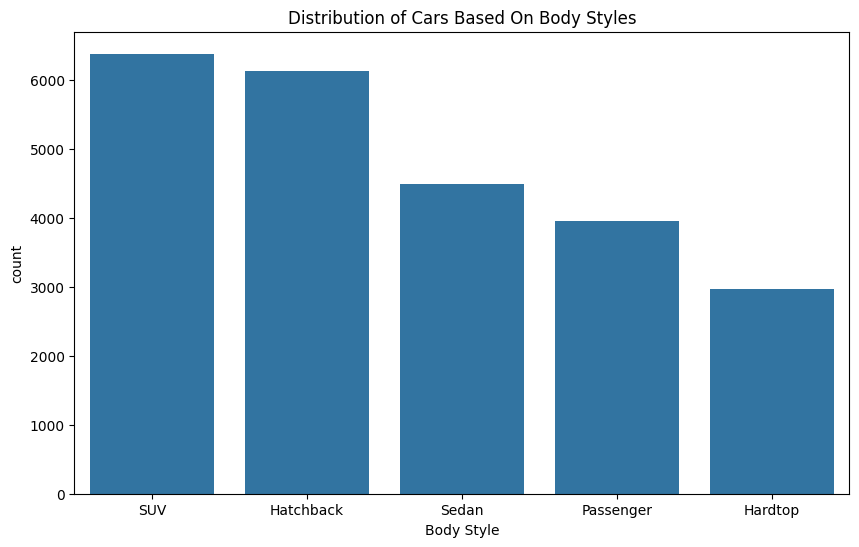

In [110]:
# 5. What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title('Distribution of Cars Based On Body Styles')
plt.show()

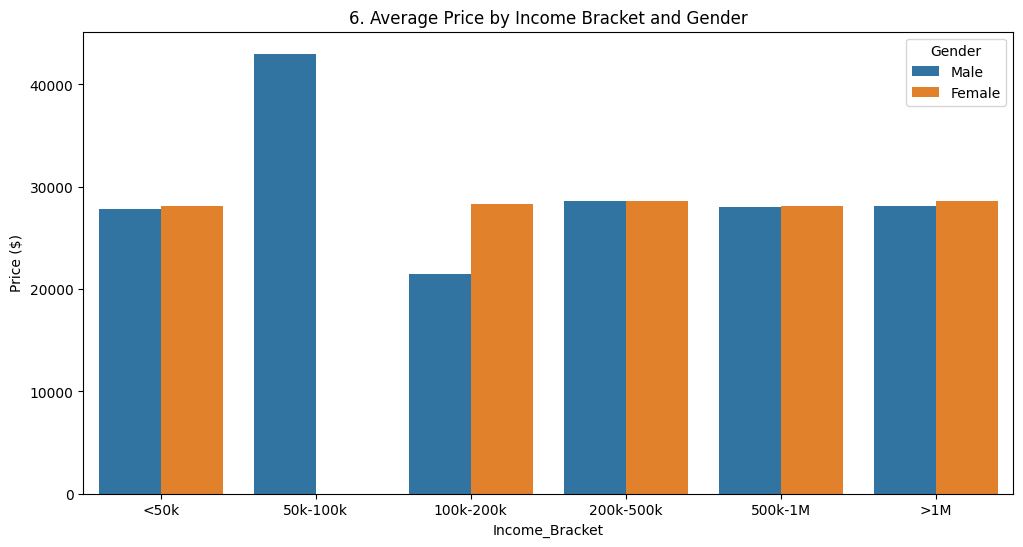

In [111]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

#pd.cut() : This divides customers into income groups
df['Income_Bracket'] = pd.cut(df['Annual Income'],
                              bins=[0, 50000, 100000, 200000, 500000, 1000000, float('inf')],
                              labels=['<50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '>1M'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', hue='Gender', data=df, errorbar=None)
plt.title('6. Average Price by Income Bracket and Gender')
plt.show()

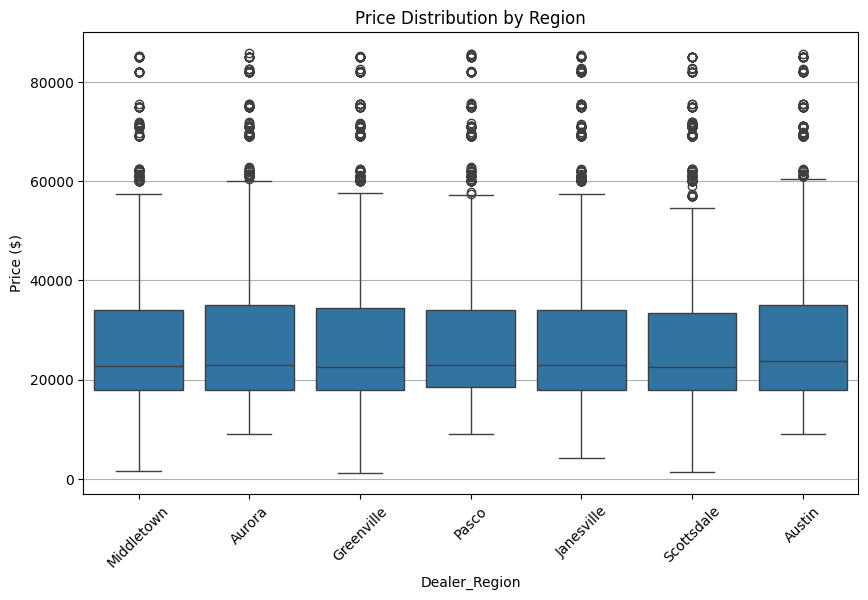


Number of cars sold by Region: 
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [112]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

region_counts = df['Dealer_Region'].value_counts()
print(f"\nNumber of cars sold by Region: \n{region_counts}")

In [113]:
# 8. How does the average car price differ between cars with different engine sizes?

avg_car_price_engine = df.groupby('Engine')['Price ($)'].mean()
print(f"Average Price by Engine Type: \n{avg_car_price_engine}")


Average Price by Engine Type: 
Engine
Double Overhead Camshaft    28248.525972
Overhead Camshaft           27914.710631
Name: Price ($), dtype: float64


Price variation by Income Bracket:   Income_Bracket  count          mean   median
0           <50k   5275  27884.297820  22001.0
1       50k-100k      1  43000.000000  43000.0
2      100k-200k     15  22833.666667  19001.0
3      200k-500k   2192  28602.538321  24000.0
4        500k-1M   8875  28011.726423  23000.0
5            >1M   7548  28186.202040  23000.0


/tmp/ipython-input-4082432393.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price_stats = df.groupby('Income_Bracket')['Price ($)'].agg(['count', 'mean', 'median']).reset_index()


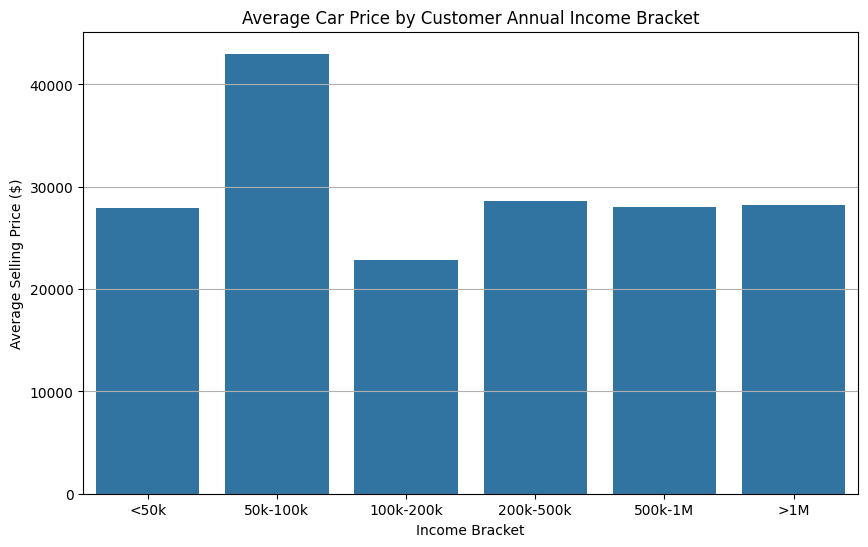

In [114]:
# 9. How do car prices vary based on the customer’s annual income bracket?

# Group by income bracket and calculate average selling price
income_price_stats = df.groupby('Income_Bracket')['Price ($)'].agg(['count', 'mean', 'median']).reset_index()
print(f"Price variation by Income Bracket: {income_price_stats}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Selling Price ($)')
plt.grid(axis='y')
plt.show()


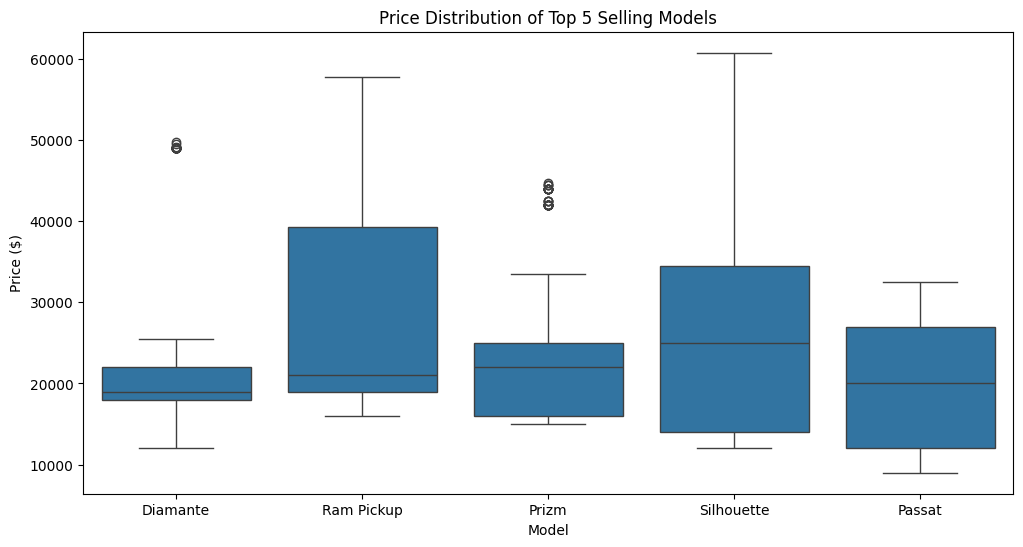

In [115]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# calculate top 5 car models which sold the most.
top_5_models = df['Model'].value_counts().head(5).index
# Filter only those top 5 models
df_top_models = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=df_top_models)
plt.title('Price Distribution of Top 5 Selling Models')
plt.show()


11. Top 5 Color-Engine Combinations with Highest Price Variation:
        Color                    Engine     Price ($)
1       Black         Overhead Camshaft  17457.405345
5         Red         Overhead Camshaft  17346.642554
2  Pale White  Double Overhead Camshaft  14402.413401
4         Red  Double Overhead Camshaft  13499.354247
3  Pale White         Overhead Camshaft  13000.103061


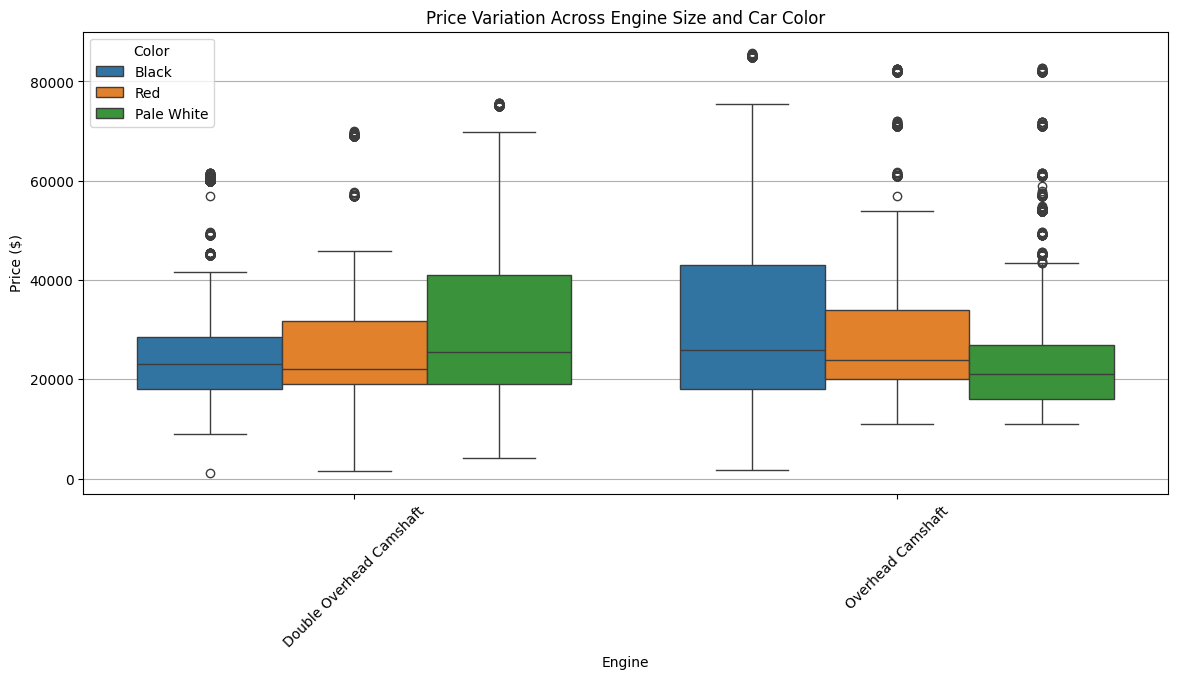

In [116]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
color_engine_std = df.groupby(['Color', 'Engine'])['Price ($)'].std().reset_index()
print("\n11. Top 5 Color-Engine Combinations with Highest Price Variation:")
print(color_engine_std.sort_values('Price ($)', ascending=False).head())

plt.figure(figsize=(14, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title("Price Variation Across Engine Size and Car Color")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


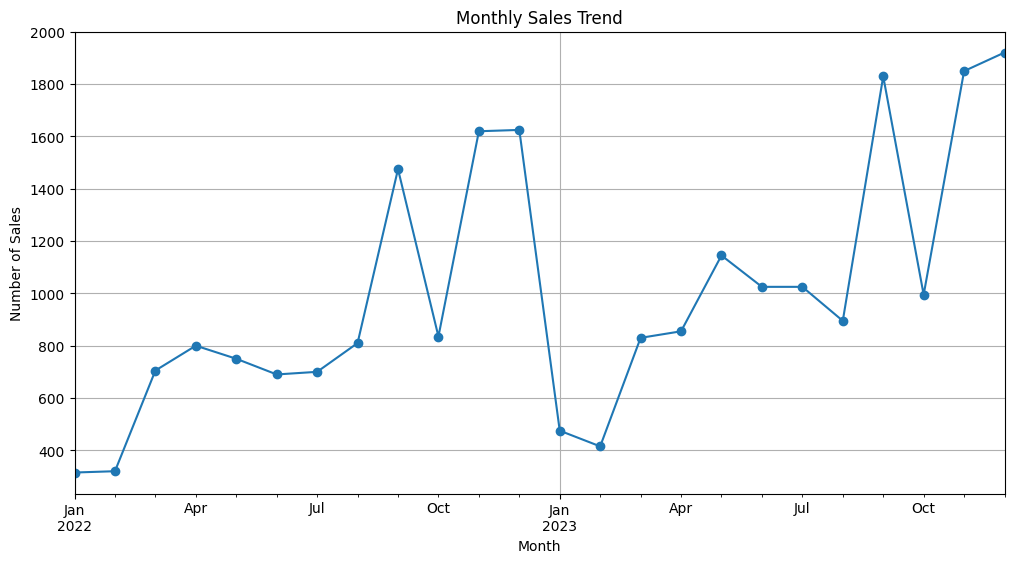

In [117]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
# Extract Month-Year for trend analysis
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year').size()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

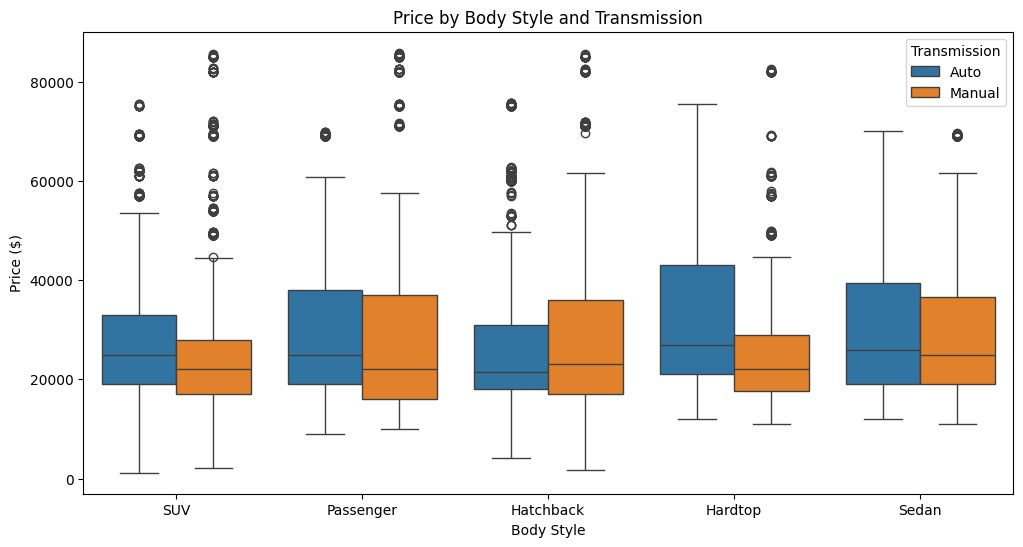

In [118]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price by Body Style and Transmission')
plt.legend(title='Transmission')
plt.show()

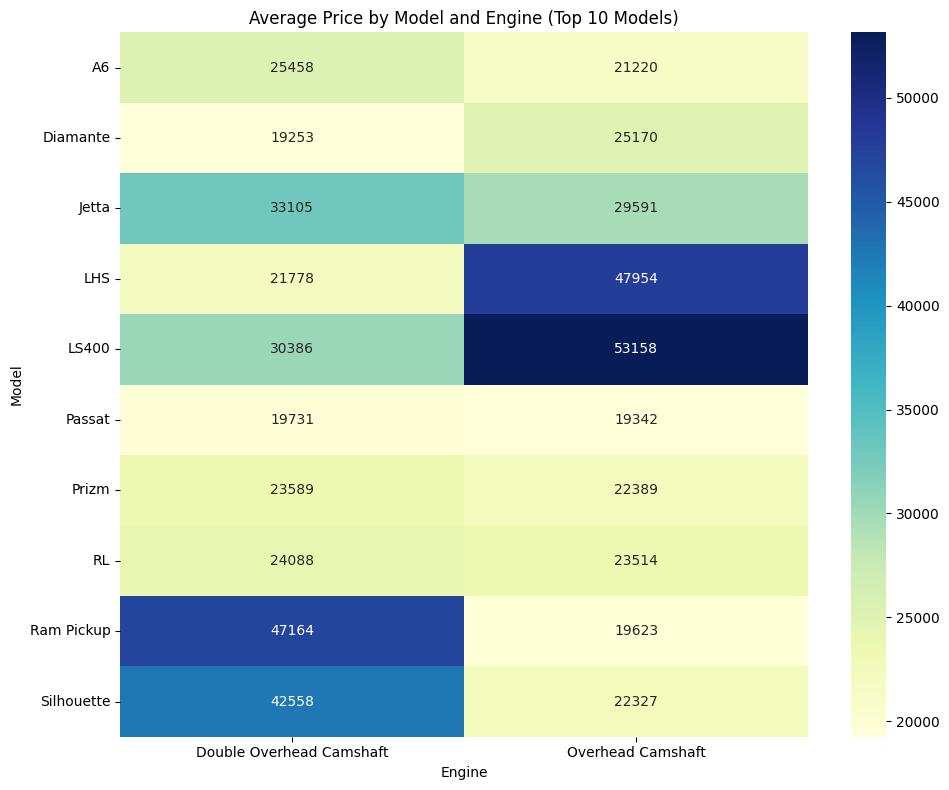

In [125]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
top_10_models = df['Model'].value_counts().head(10).index
subset_df = df[df['Model'].isin(top_10_models)]

# Create a pivot table for the heatmap
pivot_table = subset_df.pivot_table(index='Model', columns='Engine', values='Price ($)', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Model and Engine (Top 10 Models)')
plt.tight_layout()
plt.show()

In [126]:
# 15. How does the average car price vary across different car models and engine types?
model_engine_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(f"\nSample of Average Price by Model and Engine Type: \n\n{model_engine_price.head(10)}")



Sample of Average Price by Model and Engine Type: 

     Model                    Engine     Price ($)
0    3-Sep  Double Overhead Camshaft  37986.380117
1   3000GT  Double Overhead Camshaft  22764.326923
2   3000GT         Overhead Camshaft  21770.659864
3     300M  Double Overhead Camshaft  21394.888889
4     323i  Double Overhead Camshaft  16744.632287
5     323i         Overhead Camshaft  21038.162162
6     328i  Double Overhead Camshaft  21069.149606
7     328i         Overhead Camshaft  38676.177215
8  4Runner  Double Overhead Camshaft  32167.794118
9  4Runner         Overhead Camshaft  25075.416667


                                      
                                    EDA-3: Amazon Sales Data

In [127]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [140]:
from collections import Counter
import re

In [130]:
df = pd.read_csv("amazon.csv", delimiter=",")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [142]:
def clean_currency(x):
    """Removes currency symbols and commas, converts to float."""
    if isinstance(x, str):
        x = x.replace('₹', '').replace(',', '').strip()
        if not x: return np.nan
        return float(x)
    return x

def clean_percentage(x):
    """Removes percentage signs, converts to float."""
    if isinstance(x, str):
        x = x.replace('%', '').strip()
        if not x: return np.nan
        return float(x)
    return x

def clean_rating(x):
    """Cleans rating column (removes '|' etc.), converts to float."""
    if isinstance(x, str):
        x = x.replace('|', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

def clean_count(x):
    """Removes commas from counts, converts to float."""
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

# Apply cleaning
df['discounted_price'] = df['discounted_price'].apply(clean_currency)
df['actual_price'] = df['actual_price'].apply(clean_currency)
df['discount_percentage'] = df['discount_percentage'].apply(clean_percentage)
df['rating'] = df['rating'].apply(clean_rating)
df['rating_count'] = df['rating_count'].apply(clean_count)

# Drop rows with critical missing values for analysis
df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count'], inplace=True)

# Extract Main Category (assumes category format like "Main|Sub|Sub...")
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else 'Unknown')

In [143]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,Home&Kitchen
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2863.0,3690.0,22.0,4.3,6987.0,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...,Home&Kitchen


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [145]:
df.isnull().sum() # no NaN/Null/Empty value in this dataset

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [146]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [149]:
# 1. What is the average rating for each product category?

avg_rating_category = df.groupby('category')["rating"].mean()
print(f"The average rating for each product category:\n\n{avg_rating_category}")

The average rating for each product category:

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperP

Top Rating Count Products by Category: 

              main_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...       12179.0  


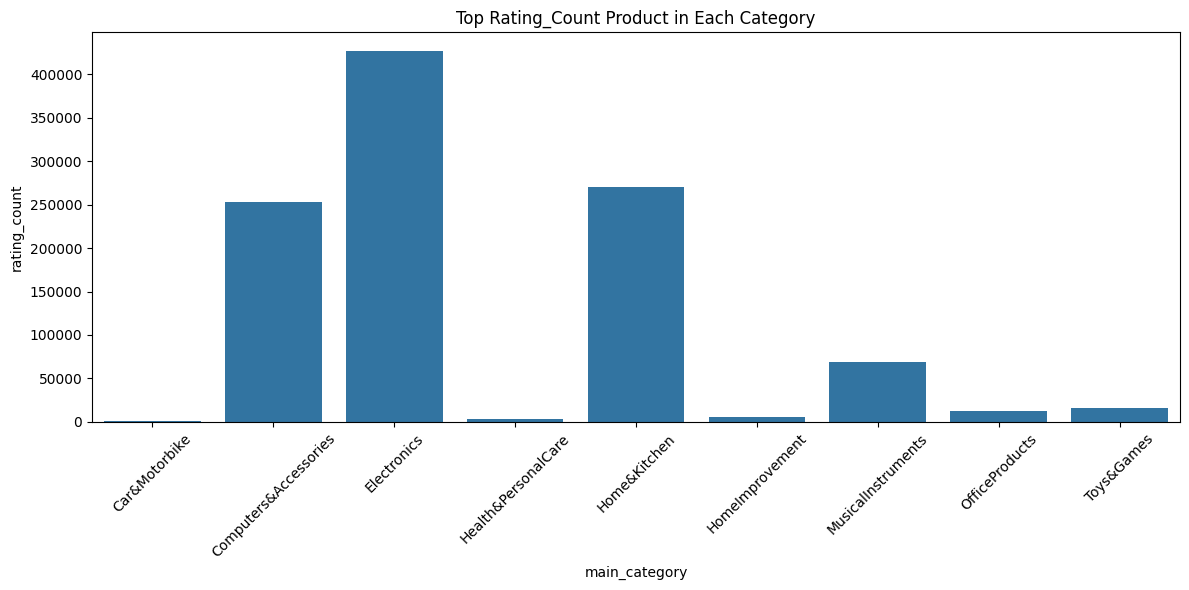

In [161]:
# 2. What are the top rating_count products by category?
idx = df.groupby('main_category')['rating_count'].idxmax()
top_rated_products = df.loc[idx, ['main_category', 'product_name', 'rating_count']]
print(f"Top Rating Count Products by Category: \n\n{top_rated_products}")

plt.figure(figsize=(12,6))
sns.barplot(x='main_category', y='rating_count', data=top_rated_products)
plt.title("Top Rating_Count Product in Each Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


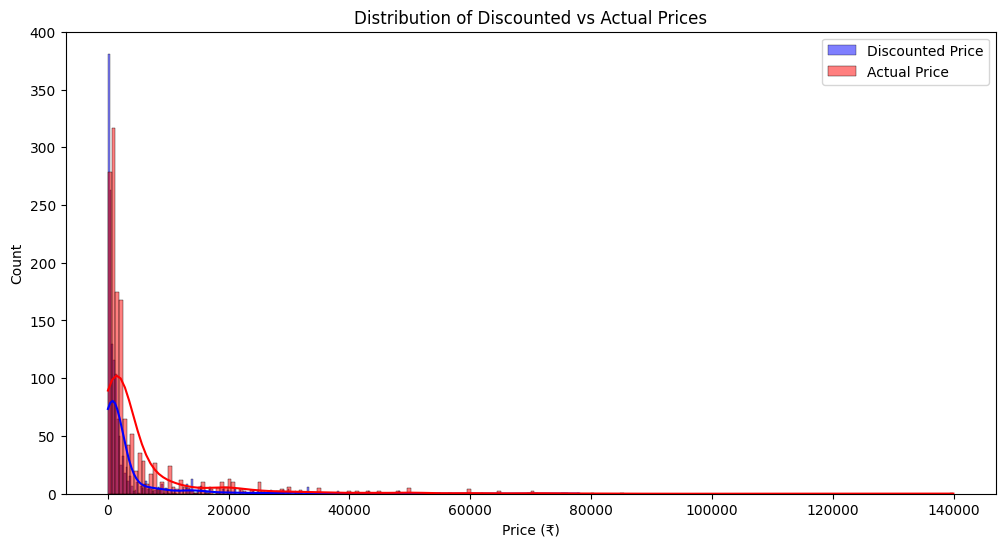

In [152]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, alpha=0.5)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, alpha=0.5)
plt.title('Distribution of Discounted vs Actual Prices')
plt.xlabel('Price (₹)')
plt.legend()
plt.show()


Average Discount Percentage by Category: 

main_category
HomeImprovement          57.500000
Computers&Accessories    53.920177
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.174497
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64




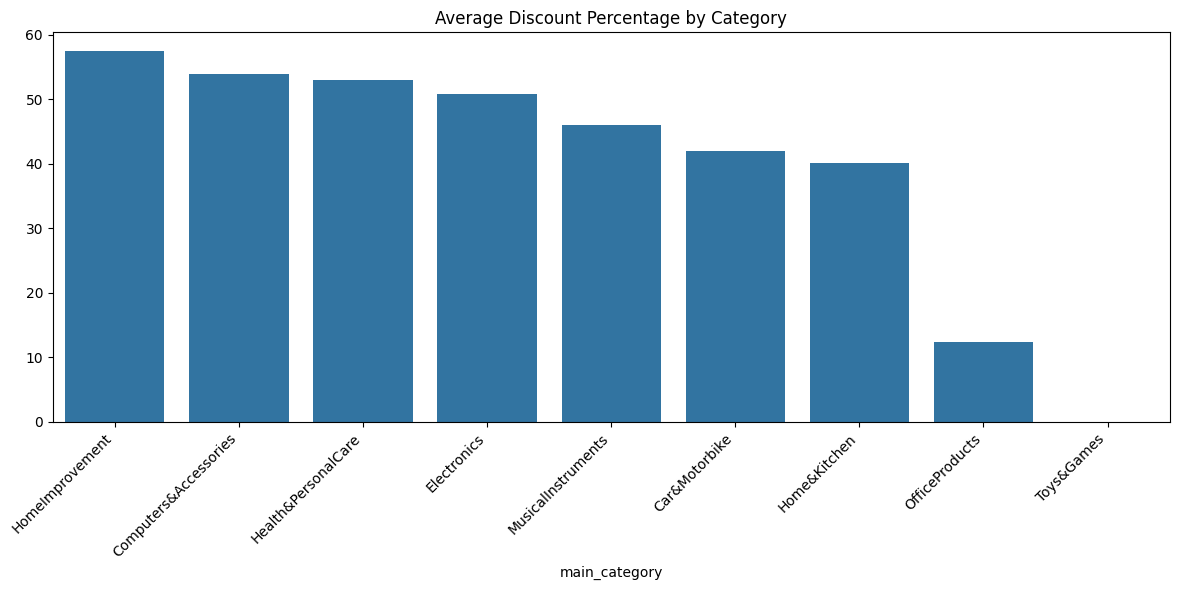

In [154]:
# 4. How does the average discount percentage vary across categories?
avg_discount_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print(f"\nAverage Discount Percentage by Category: \n\n{avg_discount_category}\n\n")

# Visualize Discount by Category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_category.index, y=avg_discount_category.values)
plt.title('Average Discount Percentage by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [159]:
# 5. What are the most popular product names?
popular_products = df['product_name'].value_counts().head(5)
print("\nMost Popular Product Names:")
popular_products



Most Popular Product Names:


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3


In [162]:
# 6. What are the most popular product keywords?

# Combine all product names into one string
all_names = ' '.join(df['product_name'].dropna().astype(str).tolist())
# Find words
words = re.findall(r'\b\w+\b', all_names.lower())
# Define stop words to ignore
stop_words = set(['and', 'for', 'with', 'the', 'in', 'to', 'of', 'a', 'is', 'on', 'pack', 'cable', 'usb'])
# Filter words
filtered_words = [w for w in words if w not in stop_words and len(w) > 2]
# Count frequency
keyword_counts = Counter(filtered_words).most_common(10)
print(f"Most Popular Product Keywords:\n{keyword_counts}")

Most Popular Product Keywords:
[('black', 528), ('charging', 245), ('type', 241), ('fast', 210), ('smart', 175), ('white', 169), ('compatible', 145), ('data', 135), ('led', 129), ('pro', 124)]


In [164]:
# 7. What are the most popular product reviews?
popular_reviews = df['review_title'].value_counts().head(5)
print(f"\nMost Popular Review Titles: \n\n{popular_reviews}")



Most Popular Review Titles: 

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                        10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                        8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good     8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue w

Correlation between Discounted Price and Rating: 0.1211


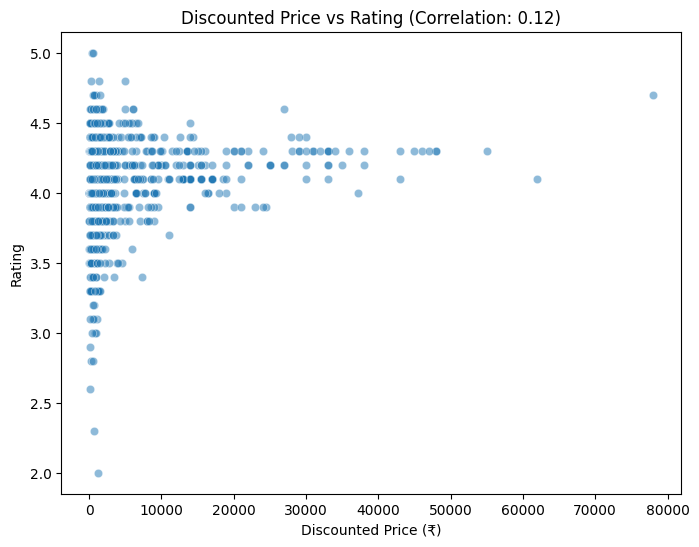

In [165]:
# 8. What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Rating: {correlation:.4f}")

# Visualize Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df, alpha=0.5)
plt.title(f'Discounted Price vs Rating (Correlation: {correlation:.2f})')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.show()

In [170]:
# 9. What are the Top 5 categories based on the highest ratings?
print("\nTop 5 Categories by Average Rating:")
avg_rating_category.head(5)


Top 5 Categories by Average Rating:


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.05


Q10. Identify any potential areas for improvement or optimization based on the data analysis
Ans.
Based on the analysis of pricing, discounts, ratings, and keyword trends in the Amazon dataset, the following improvement opportunities were identified:

- Optimize Product Pricing Strategy:
  - A large gap exists between actual price and discounted price, indicating inconsistent pricing.
  - Certain categories show very high discount percentages, which may devalue the brand.
  - Products with low ratings but high prices suggest poor price-value perception.
  - Recommendation:
  Conduct price benchmarking and apply category-wise structured discounting instead of random price drops.

- Improve Product Quality in Low-Rated Categories:
  - Some categories have noticeably lower average ratings.
  - These categories also show high return complaints in keywords (e.g., "bad", "poor", "broken").
  - Recommendation: Identify low-performing categories and address manufacturing or supplier issues.

- Optimize Listings with Better Product Titles & Keywords
  - The most frequent keywords reveal generic terms (e.g., “case”, “phone”, “wireless”).
  - Lack of uniqueness suggests SEO inefficiency.
  - Recommendation: Include more specific keywords like brand name + model + feature, which improves search visibility.
  
- Enhance Customer Engagement on Low Rating Count Items
  - Some categories have very low rating_count, indicating low customer engagement or few reviews.
  - This reduces trust and conversion rates.
  - Recommendation: Encourage customers to leave reviews using incentives or post-purchase reminders.

- Improve Discount Structure Based on Category Performance
  - Some categories offer high discounts but don’t show higher rating or sales correlation.
  - This means that heavy discounting is not always improving customer satisfaction.
  - Recommendation: Use data-driven discounting aligned with category performance and customer demand.

- Improve Product Descriptions and Visuals
  - Keywords show common complaints related to missing parts, misleading descriptions, or poor quality.
  - Products with high rating_count but low ratings often have misleading listings.
  - Recommendation: Rewrite descriptions, add high-quality images, and highlight key specs clearly.
  
- Analyze and Control Manufacturing/Delivery Issues
  - Keywords like broken, damaged, missing appear frequently in reviews.
  - This indicates operational and packaging flaws.
  - Recommendation: Strengthen packaging standards and monitor courier performance.

- Focus on High-Rating Categories for Expansion
  - Top 5 categories with high average ratings show strong customer satisfaction.
  - These categories have better long-term growth potential.
  - Recommendation: Add more SKUs in top-rated categories and invest in marketing them.

- Cross-Sell Based on Keyword Trends
  - Keyword frequency analysis shows common product associations (phone, case, charger).
  - These reveal cross-selling opportunities.
  - Recommendation: Bundle complementary accessories or promote “Frequently Bought Together” offers.
  


              EDA-4 : Spotify Data -> Popular Hip-Hop Artists and Track

In [171]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [173]:
df = pd.read_csv("spotify.csv", delimiter=",")
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [175]:
df.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [176]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
print(f"Null values before cleaning: {df.isnull().sum()}")

# Drop null values (if any)
df.dropna(inplace=True)

# Check and remove duplicate rows
print(f"Duplicate rows before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

Null values before cleaning: Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows before cleaning: 27
Duplicate rows after cleaning: 0


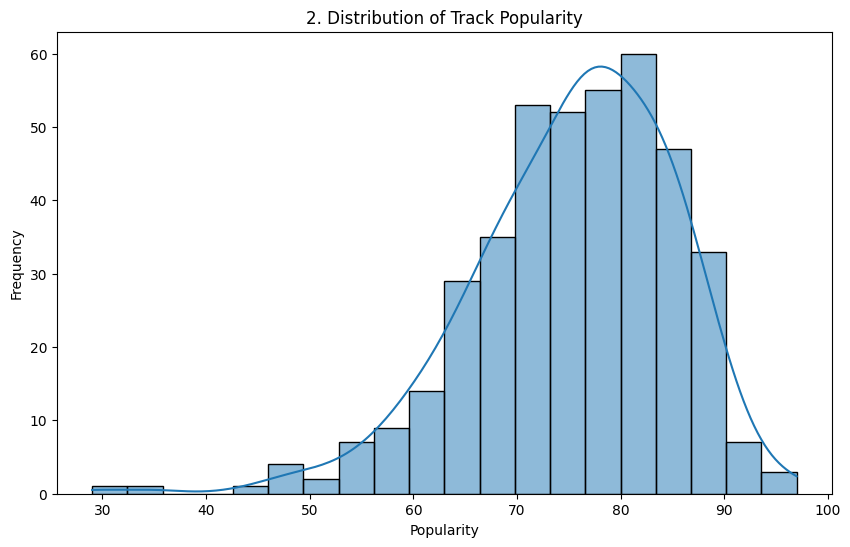

In [177]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('2. Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

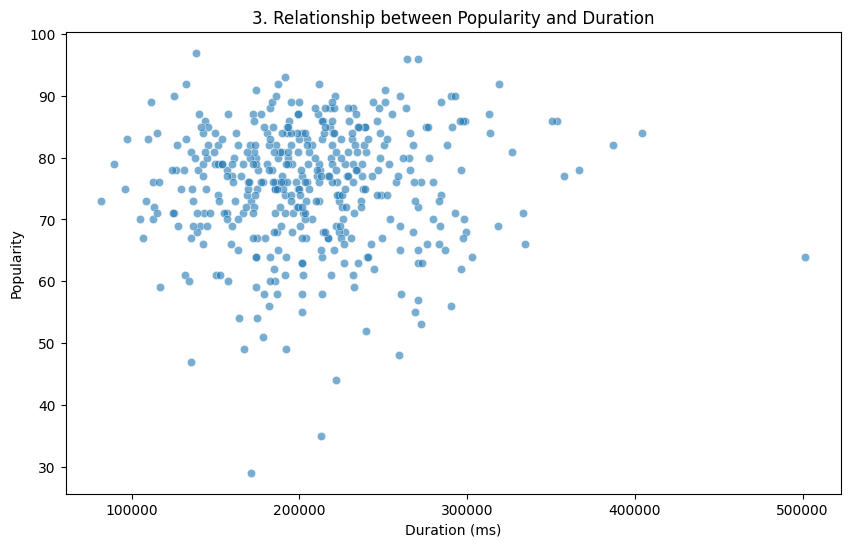

In [178]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.6)
plt.title('3. Relationship between Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4. Artist with the highest number of tracks: Drake (17 tracks)


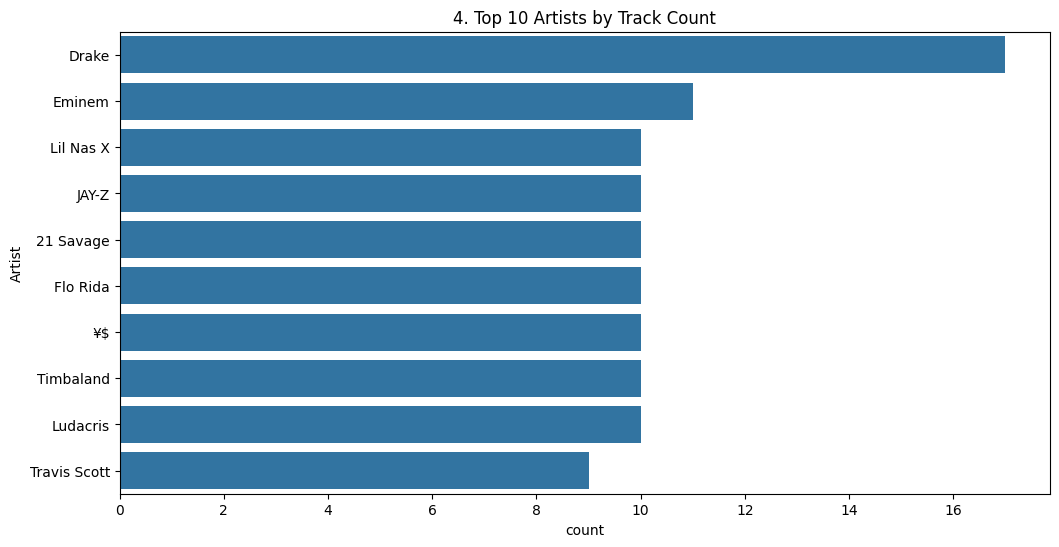

In [179]:
# 5. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
artist_counts = df['Artist'].value_counts()
top_artist_name = artist_counts.idxmax()
top_artist_count = artist_counts.max()
print(f"\n4. Artist with the highest number of tracks: {top_artist_name} ({top_artist_count} tracks)")

# Visualize top 10 artists for better readability
top_10_artists = artist_counts.head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_10_artists)], order=top_10_artists)
plt.title('4. Top 10 Artists by Track Count')
plt.show()

In [181]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular = df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular)

# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_5_artists_list = artist_counts.head(5).index
avg_pop_top_5 = df[df['Artist'].isin(top_5_artists_list)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity of Top 5 Artists (by track count):")
print(avg_pop_top_5)



Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Average Popularity of Top 5 Artists (by track count):
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [185]:
# 7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
print("\nMost Popular Tracks for Top 5 Artists:")
for artist in top_5_artists_list:
    artist_tracks = df[df['Artist'] == artist]
    # Find the track with max popularity for this artist
    most_pop_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    print(f"   - {artist}: '{most_pop_track['Track Name']}' (Popularity: {most_pop_track['Popularity']})")




Most Popular Tracks for Top 5 Artists:
   - Drake: 'Rich Baby Daddy (feat. Sexyy Red & SZA)' (Popularity: 92)
   - Eminem: 'Without Me' (Popularity: 90)
   - Lil Nas X: 'THATS WHAT I WANT' (Popularity: 81)
   - JAY-Z: 'Ni**as In Paris' (Popularity: 86)
   - 21 Savage: 'redrum' (Popularity: 96)


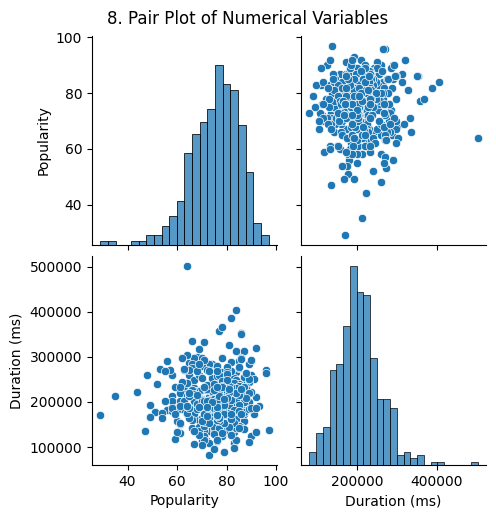

In [184]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
numerical_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_cols])
plt.suptitle('8. Pair Plot of Numerical Variables', y=1.02) # Adjust title position
plt.show()

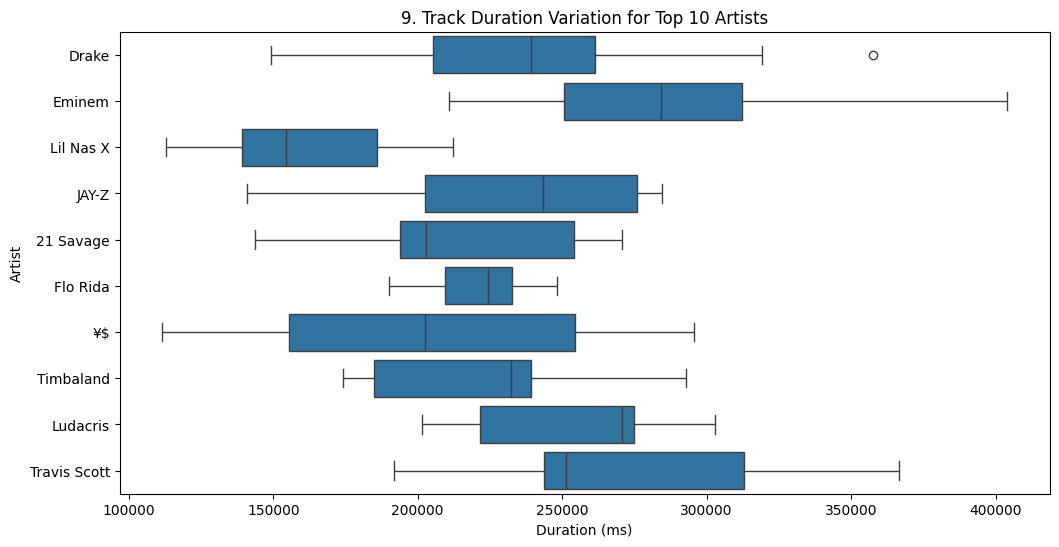

In [183]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot orviolin plot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration (ms)', y='Artist', data=df[df['Artist'].isin(top_10_artists)], order=top_10_artists)
plt.title('9. Track Duration Variation for Top 10 Artists')
plt.show()


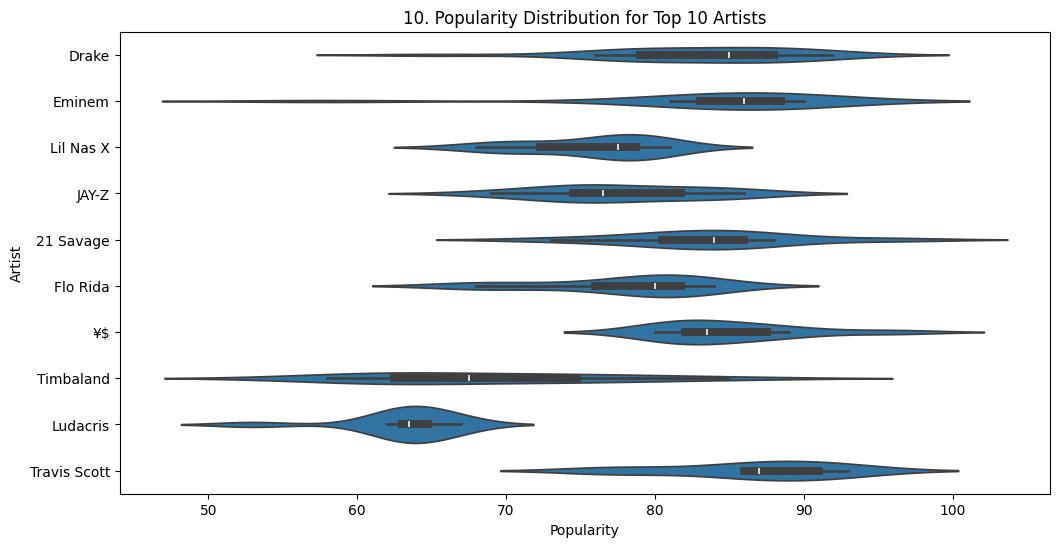

In [182]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Popularity', y='Artist', data=df[df['Artist'].isin(top_10_artists)], order=top_10_artists)
plt.title('10. Popularity Distribution for Top 10 Artists')
plt.show()